# Assignment 3 Visualizations

- All figures have been numbered according the report.
- Necesaary libraries should be installed before running any cell. (matplotlib, numpy, pandas, seaborn, plotly,upsetplot, prophet )

## Pre processing and data exploration

In [45]:
import pandas as pd

In [46]:
#import the datasets
crime=pd.read_csv("./data/union.csv")
arrest=pd.read_csv("./data/arrest.csv")

In [47]:
#print columns of the datasets
print(crime.columns)
print(arrest.columns)

Index(['Table Names', 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC',
       'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'LOCATION', 'Cross Street', 'LAT', 'LON', 'AREA '],
      dtype='object')
Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location',
       'Zip Codes', 'Census Tracts', 'Precinct Boundaries',
       'LA Specific Plans', 'Council Districts',
       'Neighborhood Councils (Certified)'],
      dtype='object')


In [48]:
#remove data with lat and long as 0
crime=crime[crime['LAT']!=0]
crime=crime[crime['LON']!=0]


In [49]:
import pandas as pd

# Sample DataFrame
df_crime = pd.DataFrame(crime)
unique_values = df_crime['AREA NAME'].unique()

# Calculate average latitude and longitude based on area
avg_coords = df_crime.groupby('AREA NAME').agg({'LAT': 'mean', 'LON': 'mean'}).reset_index()
avg_coords.columns = ['AREA NAME', 'avg_latitude', 'avg_longitude']

# Merge the average coordinates back into the original DataFrame
df_crime = df_crime.merge(avg_coords, on='AREA NAME', how='left')

df_crime.tail(10)

,Table Names,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON,AREA,avg_latitude,avg_longitude
3058643,Crime_Data_from_2010_to_2019.csv,160519223,26-11-2016 00:00:00,21-11-2016 00:00:00,1200,Harbor,584,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,700 W 26TH ST,NaN,33.7206,-118.2938,5,33.770424,-118.28585
3058644,Crime_Data_from_2010_to_2019.csv,160519158,24-11-2016 00:00:00,22-11-2016 00:00:00,1100,Harbor,564,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,400 W 2ND ST,NaN,33.7424,-118.2857,5,33.770424,-118.28585
3058645,Crime_Data_from_2010_to_2019.csv,160519157,24-11-2016 00:00:00,24-11-2016 00:00:00,1600,Harbor,529,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,700 SANFORD AV,NaN,33.7792,-118.2506,5,33.770424,-118.28585
3058646,Crime_Data_from_2010_to_2019.csv,160519568,04-12-2016 00:00:00,03-12-2016 00:00:00,1630,Harbor,515,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,1400 ISLAND AV,NaN,33.7910,-118.2670,5,33.770424,-118.28585
3058647,Crime_Data_from_2010_to_2019.csv,160519585,05-12-2016 00:00:00,04-12-2016 00:00:00,1800,Harbor,504,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,19500 NORMANDIE AV,NaN,33.8481,-118.3041,5,33.770424,-118.28585
3058648,Crime_Data_from_2010_to_2019.csv,160519936,12-12-2016 00:00:00,12-12-2016 00:00:00,1,Harbor,514,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,1300 W Q ST,NaN,33.7942,-118.2788,5,33.770424,-118.28585
3058649,Crime_Data_from_2010_to_2019.csv,160520139,17-12-2016 00:00:00,16-12-2016 00:00:00,1500,Harbor,562,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,1100 W 13TH ST,NaN,33.7325,-118.3012,5,33.770424,-118.28585
3058650,Crime_Data_from_2010_to_2019.csv,160520579,27-12-2016 00:00:00,20-12-2016 00:00:00,1700,Harbor,532,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,900 W DENNI ST,NaN,33.7844,-118.2733,5,33.770424,-118.28585
3058651,Crime_Data_from_2010_to_2019.csv,170504427,10-01-2017 00:00:00,25-12-2016 00:00:00,1200,Harbor,522,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,900 WILMINGTON BL,NaN,33.7808,-118.2743,5,33.770424,-118.28585
3058652,Crime_Data_from_2010_to_2019.csv,170519490,05-12-2017 00:00:00,21-11-2017 00:00:00,1100,Harbor,566,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,300 W 10TH ST,NaN,33.7351,-118.2835,5,33.770424,-118.28585


In [50]:
print(avg_coords)

      AREA NAME  avg_latitude  avg_longitude
0   77th Street     33.977924    -118.297671
1       Central     34.047236    -118.250440
2    Devonshire     34.250913    -118.537795
3      Foothill     34.249160    -118.379037
4        Harbor     33.770424    -118.285850
5    Hollenbeck     34.055455    -118.202417
6     Hollywood     34.099253    -118.330026
7       Mission     34.256288    -118.450204
8   N Hollywood     34.172389    -118.385405
9        Newton     34.007952    -118.260961
10    Northeast     34.108035    -118.243105
11      Olympic     34.060012    -118.300225
12      Pacific     33.984376    -118.424562
13      Rampart     34.063898    -118.274507
14    Southeast     33.939312    -118.266540
15    Southwest     34.019473    -118.317770
16      Topanga     34.192791    -118.601095
17     Van Nuys     34.178630    -118.446514
18      West LA     34.052102    -118.439922
19  West Valley     34.187291    -118.520704
20     Wilshire     34.061369    -118.351756


In [51]:
#print rows with area name= holloywood
print(df_crime[df_crime['AREA NAME'] == 'Hollywood'])

                                 Table Names      DR_NO            Date Rptd  \
1142     Crime_Data_from_2020_to_Present.csv  230611891  30-06-2023 00:00:00   
1143     Crime_Data_from_2020_to_Present.csv  230612578  13-07-2023 00:00:00   
1144     Crime_Data_from_2020_to_Present.csv  230612577  17-07-2023 00:00:00   
1145     Crime_Data_from_2020_to_Present.csv  230613008  23-07-2023 00:00:00   
1146     Crime_Data_from_2020_to_Present.csv  230613006  23-07-2023 00:00:00   
...                                      ...        ...                  ...   
3054600     Crime_Data_from_2010_to_2019.csv  120622788  11-09-2012 00:00:00   
3054601     Crime_Data_from_2010_to_2019.csv  130622875  08-10-2013 00:00:00   
3054602     Crime_Data_from_2010_to_2019.csv  120605942  25-01-2012 00:00:00   
3054603     Crime_Data_from_2010_to_2019.csv  120604534  07-01-2012 00:00:00   
3054604     Crime_Data_from_2010_to_2019.csv  120620260  08-08-2012 00:00:00   

                    DATE OCC  TIME OCC 

In [52]:
arrest.rename(columns={'Area Name': 'AREA NAME'}, inplace=True)
arrest.head()

,Report ID,Arrest Date,Time,Area ID,AREA NAME,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Charge Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,5666847,2019-06-22T00:00:00.000,1630.0,14,Pacific,1457,44,M,W,24.0,...,VANDALISM,12300 CULVER BL,NaN,"{'latitude': '33.992', 'human_address': '{""add...",24031.0,918.0,1137.0,10.0,10.0,85.0
1,5666688,2019-06-22T00:00:00.000,1010.0,10,West Valley,1061,8,M,O,NaN,...,NaN,19000 VANOWEN ST,NaN,"{'latitude': '34.1687', 'human_address': '{""ad...",19339.0,321.0,1494.0,NaN,4.0,10.0
2,5666570,2019-06-22T00:00:00.000,400.0,15,N Hollywood,1543,31,F,O,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,MAGNOLIA AV,LAUREL CANYON BL,"{'latitude': '34.1649', 'human_address': '{""ad...",8890.0,205.0,1332.0,17.0,5.0,39.0
3,5666529,2019-06-22T00:00:00.000,302.0,17,Devonshire,1738,23,F,W,22.0,...,DRUNK DRIVING ALCOHOL/DRUGS,HAYVENHURST ST,N REGAN FY,"{'latitude': '34.2692', 'human_address': '{""ad...",19329.0,69.0,388.0,NaN,2.0,78.0
4,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,OBSTRUCT/RESIST EXECUTIVE OFFICER,6600 ESPLANADE ST,NaN,"{'latitude': '33.9609', 'human_address': '{""ad...",25075.0,937.0,241.0,10.0,10.0,16.0


In [53]:
df_arrest = pd.DataFrame(arrest)
df_arrest = df_arrest.merge(avg_coords, on='AREA NAME', how='left')
df_arrest.head()

,Report ID,Arrest Date,Time,Area ID,AREA NAME,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),avg_latitude,avg_longitude
0,5666847,2019-06-22T00:00:00.000,1630.0,14,Pacific,1457,44,M,W,24.0,...,NaN,"{'latitude': '33.992', 'human_address': '{""add...",24031.0,918.0,1137.0,10.0,10.0,85.0,33.984376,-118.424562
1,5666688,2019-06-22T00:00:00.000,1010.0,10,West Valley,1061,8,M,O,NaN,...,NaN,"{'latitude': '34.1687', 'human_address': '{""ad...",19339.0,321.0,1494.0,NaN,4.0,10.0,34.187291,-118.520704
2,5666570,2019-06-22T00:00:00.000,400.0,15,N Hollywood,1543,31,F,O,22.0,...,LAUREL CANYON BL,"{'latitude': '34.1649', 'human_address': '{""ad...",8890.0,205.0,1332.0,17.0,5.0,39.0,34.172389,-118.385405
3,5666529,2019-06-22T00:00:00.000,302.0,17,Devonshire,1738,23,F,W,22.0,...,N REGAN FY,"{'latitude': '34.2692', 'human_address': '{""ad...",19329.0,69.0,388.0,NaN,2.0,78.0,34.250913,-118.537795
4,5666742,2019-06-22T00:00:00.000,1240.0,14,Pacific,1472,28,M,W,8.0,...,NaN,"{'latitude': '33.9609', 'human_address': '{""ad...",25075.0,937.0,241.0,10.0,10.0,16.0,33.984376,-118.424562


## Fig 9: Crime and Arrest trend across the years in LA.

In [54]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'df_crime' and 'df_arrest' DataFrames are already defined and contain 'DATE OCC' and 'Arrest Date'

# Convert 'DATE OCC' and 'Arrest Date' to datetime format
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC'], format='%d-%m-%Y %H:%M:%S')
df_arrest['Arrest Date'] = pd.to_datetime(df_arrest['Arrest Date'], errors='coerce')  # Handle errors gracefully

# Resample to monthly counts
crime_counts_monthly = df_crime.resample('M', on='DATE OCC').size().reset_index(name='count')
arrest_counts_monthly = df_arrest.resample('M', on='Arrest Date').size().reset_index(name='count')

# Filter data up to 2019
crime_counts_monthly = crime_counts_monthly[crime_counts_monthly['DATE OCC'] < '2020-01-01']
arrest_counts_monthly = arrest_counts_monthly[arrest_counts_monthly['Arrest Date'] < '2020-01-01']

# Create figure
fig = go.Figure()

# Add Crime data trace
fig.add_trace(go.Scatter(
    x=crime_counts_monthly['DATE OCC'],
    y=crime_counts_monthly['count'],
    mode='lines',
    name='Crimes',  # Label for the line
    line=dict(color='blue')  # Color for crimes
))

# Add Arrest data trace
fig.add_trace(go.Scatter(
    x=arrest_counts_monthly['Arrest Date'],
    y=arrest_counts_monthly['count'],
    mode='lines',
    name='Arrests',  # Label for the line
    line=dict(color='red')  # Color for arrests
))

# Update x-axis to show only year labels and format it as year
fig.update_xaxes(
    dtick="M12",  # Sets the tick mark to yearly intervals
    tickformat="%Y",  # Display only the year
    ticklabelmode="period"  # Ensure the label is shown for the period, i.e., the year
)

# Update layout for better visualization
fig.update_layout(
    title='Monthly Crime and Arrest Counts (Up to 2019)',
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Category'
)

fig.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_5808\1901652518.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\subha\AppData\Local\Temp\ipykernel_5808\1901652518.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



## Fig 6: Crime count in different regions of LA (2010-2019)

In [37]:
import plotly.express as px
import pandas as pd

# Assuming `df_crime` has columns: ['Area Name', 'avg_latitude', 'avg_longitude', 'count', 'DATE OCCR']

# Convert the 'DATE OCCR' column to datetime if it's not already in that format
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC'], errors='coerce')

# Extract the year from the 'DATE OCCR' column
df_crime['year'] = df_crime['DATE OCC'].dt.year

# Filter the data to include only records from 2019 and below
df_crime_filtered = df_crime[df_crime['year'] <= 2019]

# Aggregate crime data by area (latitude, longitude, and area name)
crime_summary = df_crime_filtered.groupby(['AREA NAME', 'avg_latitude', 'avg_longitude']).size().reset_index(name='count')

# Plotting with color scale based on 'count' (crime count)
fig = px.scatter_mapbox(
    crime_summary,
    lat='avg_latitude',
    lon='avg_longitude',
    size='count',  # Size of the bubbles
    text='AREA NAME',  # Labels for the bubbles
    hover_name='AREA NAME',  # Hover text
    hover_data={'count': True, 'avg_latitude': False, 'avg_longitude': False},  # Display count in hover, hide lat/lon
    title='Crime Data in Los Angeles (Up to 2019)',
    color='count',  # Color the bubbles by crime count
    color_continuous_scale=['#f8c104', '#9b020e'],  # Custom color scale from mustard to dark red
    size_max=15,  # Maximum bubble size
    zoom=10,  # Initial zoom level
)

# Update map style
fig.update_layout(
    mapbox_style="carto-positron",  # Use Carto Positron map style
    mapbox_center={"lat": 34.0522, "lon": -118.2437},  # Center around LA
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Minimize blank margins
)

# Show the plot
fig.show()


## Fig 5: Arrest count in different regions of LA (2010-2019)

In [13]:
import plotly.express as px

# Assuming `df_crime` has columns: ['Area Name', 'avg_latitude', 'avg_longitude', 'count']

# Aggregate crime data by area (latitude, longitude, and area name)
crime_summary = df_arrest.groupby(['AREA NAME', 'avg_latitude', 'avg_longitude']).size().reset_index(name='count')

# Plotting with color scale based on 'count' (crime count)
fig = px.scatter_mapbox(
    crime_summary,
    lat='avg_latitude',
    lon='avg_longitude',
    size='count',  # Size of the bubbles
    text='AREA NAME',  # Labels for the bubbles
    hover_name='AREA NAME',  # Hover text
    hover_data={'count': True, 'avg_latitude': False, 'avg_longitude': False},  # Display count in hover, hide lat/lon
    title='Arrest Data in Los Angeles',
    color='count',  # Color the bubbles by crime count
    color_continuous_scale=['#f8c104', '#9b020e'],  # Custom color scale from mustard to dark red
    size_max=20,  # Maximum bubble size
    zoom=10,  # Initial zoom level
)

# Update map style
fig.update_layout(
    mapbox_style="carto-positron",  # Use Carto Positron map style
    mapbox_center={"lat": 34.0522, "lon": -118.2437},  # Center around LA
    margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Minimize blank margins
)

# Show the plot
fig.show()


## Fig 11: Sankey diagram showing flow of arrest data (Gender,Age Groups,Descent)

In [60]:
import pandas as pd
import plotly.graph_objects as go
import random

# Sample data preparation: create age groups
df_arrest['Age Group'] = pd.cut(
    df_arrest['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['0-18', '19-30', '31-45', '46-60', '61+'],
    right=False
)

# Aggregate data: count combinations of Sex Code, Age Group, and Descent Code
sankey_data = df_arrest.groupby(['Sex Code', 'Age Group', 'Descent Code']).size().reset_index(name='Count')

# Create unique labels for Sankey nodes by adding prefixes to distinguish similar values
sex_labels = ['Sex - ' + x for x in sankey_data['Sex Code'].unique().tolist()]
age_labels = sankey_data['Age Group'].unique().tolist()
descent_labels = ['Descent - ' + x for x in sankey_data['Descent Code'].unique().tolist()]

# Combine labels in proper order: Sex -> Age -> Descent
labels = sex_labels + age_labels + descent_labels

# Map labels to indices
label_to_index = {label: i for i, label in enumerate(labels)}

# Define source and target for Sankey links
# Step 1: Sex Code → Age Group
sources_sex_age = sankey_data['Sex Code'].map(lambda x: label_to_index['Sex - ' + x])
targets_sex_age = sankey_data['Age Group'].map(lambda x: label_to_index[x])

# Step 2: Age Group → Descent Code
sources_age_descent = sankey_data['Age Group'].map(lambda x: label_to_index[x])
targets_age_descent = sankey_data['Descent Code'].map(lambda x: label_to_index['Descent - ' + x])

# Combine sources and targets
sources = sources_sex_age.tolist() + sources_age_descent.tolist()
targets = targets_sex_age.tolist() + targets_age_descent.tolist()

# Define link values (aggregated count)
values = sankey_data['Count'].tolist() * 2  # Repeat for both link sets (Sex → Age, Age → Descent)

# Group by source and target to ensure single links (no divisions)
unique_links = pd.DataFrame({'source': sources, 'target': targets, 'value': values})
unique_links = unique_links.groupby(['source', 'target'], as_index=False)['value'].sum()

# Redefine the sources, targets, and values for the Sankey diagram
sources = unique_links['source'].tolist()
targets = unique_links['target'].tolist()
values = unique_links['value'].tolist()

# Generate distinct colors for nodes
node_colors = [f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 0.8)' for _ in labels]

# Assign link colors based on source node
link_colors = [node_colors[source] for source in sources]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,  # Reduce padding for compact blocks
        thickness=30,  # Increase thickness for block-like nodes
        line=dict(color="black", width=0.5),
        label=labels,  # Node labels
        color=node_colors  # Node colors
    ),
    link=dict(
        source=sources,  # Source nodes
        target=targets,  # Target nodes
        value=values,  # Link values
        color=link_colors,  # Link colors based on source node
    )
)])

# Add axis labels as annotations
fig.add_annotation(
    x=0, y=1.05, text="Gender", showarrow=False, font=dict(size=14), align="center"
)
fig.add_annotation(
    x=0.5, y=1.05, text="Age", showarrow=False, font=dict(size=14), align="center"
)
fig.add_annotation(
    x=1, y=1.05, text="Descent", showarrow=False, font=dict(size=14), align="center"
)

# Update layout for better visualization
fig.update_layout(
    title_text="Sankey Diagram: Arrest Data (Sex → Age → Descent)",
    font_size=12,
    margin=dict(l=50, r=50, t=70, b=50)  # Increase top margin for annotations
)

# Show the plot
fig.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_5808\1618227849.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Fig 12: UpSet plot: Male 

c:\Users\subha\miniconda3\envs\dv\lib\site-packages\upsetplot\data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\subha\miniconda3\envs\dv\lib\site-packages\upsetplot\plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\subha\miniconda3\envs\dv\lib\site-packages\upsetplot\plot

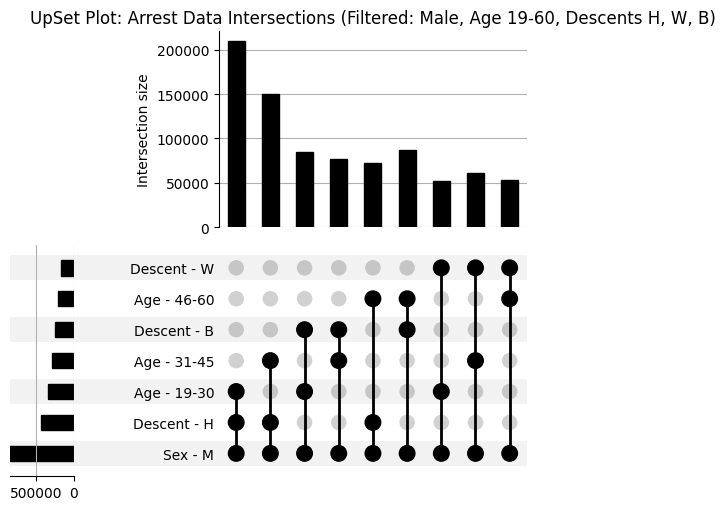

In [18]:
import pandas as pd
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Sample data preparation: create age groups
df_arrest['Age Group'] = pd.cut(
    df_arrest['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['0-18', '19-30', '31-45', '46-60', '61+'],
    right=False
)

# Define specific age groups, descents, and genders to filter
selected_age_groups = ['19-30', '31-45', '46-60']
selected_descents = ['H', 'W', 'B']  # Replace with the desired descent codes
selected_genders = ['M']  # Replace with the desired gender codes

# Filter the DataFrame based on the conditions
filtered_df = df_arrest[
    (df_arrest['Age Group'].isin(selected_age_groups)) & 
    (df_arrest['Descent Code'].isin(selected_descents)) & 
    (df_arrest['Sex Code'].isin(selected_genders))
]

# Create list of memberships for UpSet plot
memberships = filtered_df.apply(
    lambda row: (
        f"Sex - {row['Sex Code']}",
        f"Age - {row['Age Group']}",
        f"Descent - {row['Descent Code']}"
    ), 
    axis=1
)

# Create UpSet data from memberships
upset_data = from_memberships(memberships, data=filtered_df.index)

# Create the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='degree')

# Plot the data
upset.plot()
plt.title("UpSet Plot: Arrest Data Intersections (Filtered: Male, Age 19-60, Descents H, W, B)")
plt.show()


## Fig 13: UpSet plot: Female

c:\Users\subha\miniconda3\envs\dv\lib\site-packages\upsetplot\data.py:303: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\subha\miniconda3\envs\dv\lib\site-packages\upsetplot\plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



c:\Users\subha\miniconda3\envs\dv\lib\site-packages\upsetplot\plot

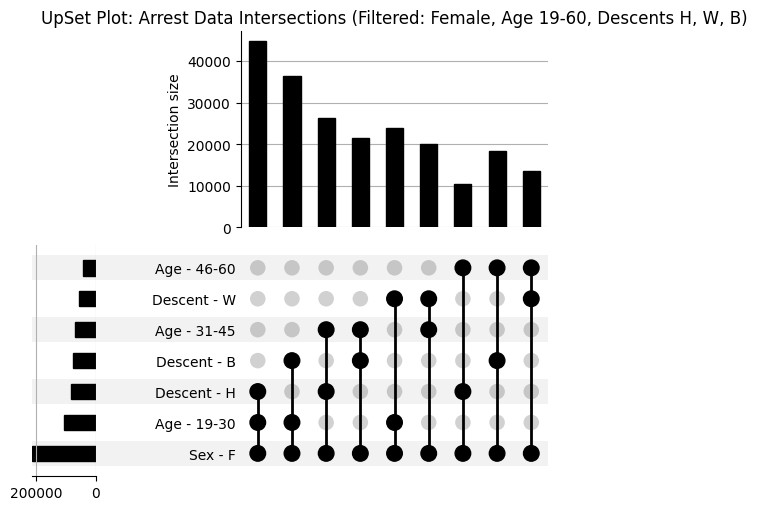

In [19]:
import pandas as pd
from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt

# Sample data preparation: create age groups
df_arrest['Age Group'] = pd.cut(
    df_arrest['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['0-18', '19-30', '31-45', '46-60', '61+'],
    right=False
)

# Define specific age groups, descents, and genders to filter
selected_age_groups = ['19-30', '31-45', '46-60']
selected_descents = ['H', 'W', 'B']  # Replace with the desired descent codes
selected_genders = ['F']  # Replace with the desired gender codes

# Filter the DataFrame based on the conditions
filtered_df = df_arrest[
    (df_arrest['Age Group'].isin(selected_age_groups)) & 
    (df_arrest['Descent Code'].isin(selected_descents)) & 
    (df_arrest['Sex Code'].isin(selected_genders))
]

# Create list of memberships for UpSet plot
memberships = filtered_df.apply(
    lambda row: (
        f"Sex - {row['Sex Code']}",
        f"Age - {row['Age Group']}",
        f"Descent - {row['Descent Code']}"
    ), 
    axis=1
)

# Create UpSet data from memberships
upset_data = from_memberships(memberships, data=filtered_df.index)

# Create the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='degree')

# Plot the data
upset.plot()
plt.title("UpSet Plot: Arrest Data Intersections (Filtered: Female, Age 19-60, Descents H, W, B)")
plt.show()


## Fig. 7. Reasons for arrest that are most common in LA.

In [22]:
import pandas as pd
import plotly.express as px

# Assuming 'df_arrest' DataFrame contains 'Charge Group Description' and 'Arrest Date'

# Group by 'Charge Group Description' and count the occurrences
charge_group_counts = df_arrest.groupby('Charge Group Description').size().reset_index(name='Arrest Count')

# Sort the values by arrest count in descending order to make the chart more readable
charge_group_counts_sorted = charge_group_counts.sort_values(by='Arrest Count', ascending=False)

# Create a bar chart using Plotly
fig = px.bar(charge_group_counts_sorted, 
             x='Charge Group Description', 
             y='Arrest Count', 
             title='Arrest Count by Charge Group Description',
             labels={'Charge Group Description': 'Charge Group Description', 'Arrest Count': 'Arrest Count'}
             )

# Rotate the x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


## Fig. 16. Treemap showing proportion of arrest charges among people of different Descent

In [62]:
import pandas as pd
import plotly.express as px

# Sample data preparation
# Assuming df_arrest DataFrame contains 'Descent Code' and 'Charge Group Description'

# Map Descent Codes to Descriptive Labels
descent_code_mapping = {
    'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian',
    'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean',
    'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan',
    'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Add descriptive labels to the dataset
df_arrest['Descent Description'] = df_arrest['Descent Code'].map(descent_code_mapping)

# Aggregate data: count combinations of Descent Description and Charge Group Description
treemap_data = df_arrest.groupby(['Descent Description', 'Charge Group Description']).size().reset_index(name='Count')

# Filter for chosen descent descriptions
chosen_descents = [
    'Hispanic/Latin/Mexican', 'Black', 'White', 'Other Asian'  # Example; replace as needed
]
treemap_data = treemap_data[treemap_data['Descent Description'].isin(chosen_descents)]

# Exclude "Miscellaneous" from Charge Group Descriptions
treemap_data = treemap_data[treemap_data['Charge Group Description'] != "Miscellaneous Other Violations"]

# Step to get the top 10 charge descriptions for each descent group
top_charge_groups_by_descent = treemap_data.groupby(['Descent Description', 'Charge Group Description'])['Count'].sum().reset_index()

# For each descent group, get the top 10 charge descriptions
top_10_per_descent = top_charge_groups_by_descent.groupby('Descent Description').apply(
    lambda x: x.nlargest(10, 'Count')
).reset_index(drop=True)

# Create a treemap
fig = px.treemap(
    top_10_per_descent,
    path=['Descent Description', 'Charge Group Description'],  # Hierarchical levels: Descent → Charge Group Description
    values='Count',  # Size of each rectangle
    color='Count',  # Color based on count
    color_continuous_scale='Blues',  # Color scale for visual distinction
    title="Treemap: Arrest Data (Descent Description → Top 10 Charge Group Descriptions)"
)

# Update layout for better visualization
fig.update_layout(
    margin=dict(l=10, r=10, t=50, b=10),  # Reduce margin for a compact plot
    title_font_size=18
)

# Show the plot
fig.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_5808\1934059138.py:36: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## Fig. 14. Treemap showing proportion of arrest charges among different age groups

In [61]:
import pandas as pd
import plotly.express as px

# Assuming df_arrest contains the 'Age Group' and 'Charge Group Description' columns

# Step 1: Aggregate data
treemap_data = df_arrest.groupby(['Age Group', 'Charge Group Description']).size().reset_index(name='Count')

# Step 2: Filter out rows where 'Count' is 0 or where 'Charge Group Description' is 'Miscellaneous Other Violations'
treemap_data = treemap_data[treemap_data['Charge Group Description'] != 'Miscellaneous Other Violations']
treemap_data = treemap_data[treemap_data['Count'] > 0]  # Ensure that there are no zero counts

# Step 3: Get the top 10 charge descriptions for each age group
treemap_data_top = (
    treemap_data.groupby('Age Group', group_keys=False)
    .apply(lambda group: group.nlargest(10, 'Count'))
)

# Step 4: Ensure there is data after filtering
if treemap_data_top.empty:
    print("No data available for the selected charge groups. Please adjust the filters.")
else:
    # Step 5: Create a Treemap
    fig = px.treemap(
        treemap_data_top,
        path=['Age Group', 'Charge Group Description'],  # Hierarchical levels
        values='Count',  # Size of each rectangle
        color='Count',  # Color based on count
        color_continuous_scale='Blues',  # Color scale for visual distinction
        title="Treemap: Arrest Data (Age Group → Top 10 Charge Group Descriptions by Age Group)"
    )

    # Step 6: Update layout for better visualization
    fig.update_layout(
        margin=dict(l=10, r=10, t=50, b=10),  # Adjust margins for a compact plot
        title_font_size=18  # Set title font size
    )

    # Show the treemap
    fig.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_5808\224828478.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\subha\AppData\Local\Temp\ipykernel_5808\224828478.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\subha\AppData\Local\Temp\ipykernel_5808\224828478.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence t

## Fig. 15. Treemap showing proportion of arrest charges among male and female categories.

In [58]:
import pandas as pd
import plotly.express as px

# Assuming df_arrest contains the 'Sex Code' and 'Charge Group Description' columns

# Step 1: Map Sex Code to descriptive labels (if not already done)
sex_code_mapping = {
    'M': 'Male', 'F': 'Female', 'U': 'Unknown'  # Adjust mapping if needed
}

# Add a descriptive label for 'Sex Code'
df_arrest['Gender'] = df_arrest['Sex Code'].map(sex_code_mapping)

# Step 2: Aggregate data by Gender and Charge Group Description
treemap_data = df_arrest.groupby(['Gender', 'Charge Group Description']).size().reset_index(name='Count')

# Step 3: Filter out rows where 'Count' is 0 or where 'Charge Group Description' is 'Miscellaneous Other Violations'
treemap_data = treemap_data[treemap_data['Charge Group Description'] != 'Miscellaneous Other Violations']
treemap_data = treemap_data[treemap_data['Count'] > 0]  # Ensure that there are no zero counts

# Step 4: Get the top 10 charge descriptions for each gender
treemap_data_top = (
    treemap_data.groupby('Gender', group_keys=False)
    .apply(lambda group: group.nlargest(10, 'Count'))
)

# Step 5: Ensure there is data after filtering
if treemap_data_top.empty:
    print("No data available for the selected charge groups. Please adjust the filters.")
else:
    # Step 6: Create a Treemap
    fig = px.treemap(
        treemap_data_top,
        path=['Gender', 'Charge Group Description'],  # Hierarchical levels
        values='Count',  # Size of each rectangle
        color='Count',  # Color based on count
        color_continuous_scale='Blues',  # Color scale for visual distinction
        title="Treemap: Arrest Data (Gender → Top 10 Charge Group Descriptions by Gender)"
    )

    # Step 7: Update layout for better visualization
    fig.update_layout(
        margin=dict(l=10, r=10, t=50, b=10),  # Adjust margins for a compact plot
        title_font_size=18  # Set title font size
    )

    # Show the treemap
    fig.show()


C:\Users\subha\AppData\Local\Temp\ipykernel_5808\2826943458.py:23: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



## Fig. 10. Monthly forecast of arrest data in LA

C:\Users\subha\AppData\Local\Temp\ipykernel_5808\3274482947.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

12:27:21 - cmdstanpy - INFO - Chain [1] start processing
12:27:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\subha\miniconda3\envs\dv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Figure size 1500x700 with 0 Axes>

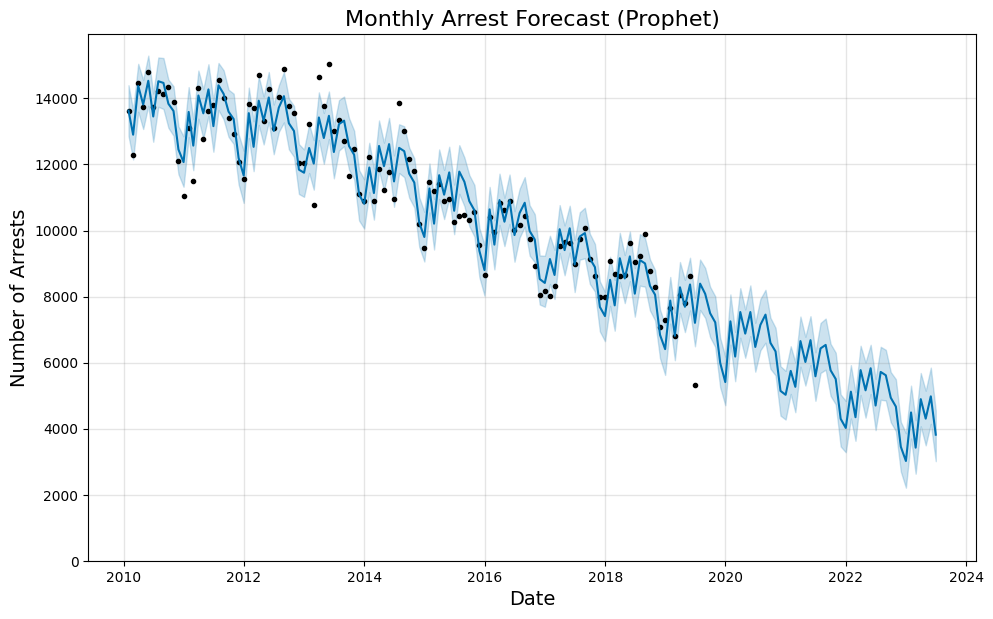

In [34]:
from prophet import Prophet
import matplotlib.pyplot as plt


# Step 1: Resample arrest data to monthly aggregates
monthly_arrest = df_arrest.resample('M').size().reset_index(name='Arrest_Count')

# Step 2: Remove outliers
def remove_outliers(df, column, threshold=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

monthly_arrest = remove_outliers(monthly_arrest, 'Arrest_Count')

# Step 3: Rename columns for Prophet
monthly_arrest.rename(columns={'Arrest Date': 'ds', 'Arrest_Count': 'y'}, inplace=True)

# Step 4: Initialize and Fit Prophet Model
model_arrest = Prophet()
model_arrest.fit(monthly_arrest)

# Step 5: Create Future Dataframe
# Forecast for 4 years (48 months)
future_arrest = model_arrest.make_future_dataframe(periods=48, freq='M')

# Step 6: Forecast Arrest Trends
forecast_arrest = model_arrest.predict(future_arrest)

# Step 7: Adjust Predictions (no negative values)
forecast_arrest[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_arrest[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Step 8: Plot Forecasted Arrest Data
plt.figure(figsize=(15, 7))
fig = model_arrest.plot(forecast_arrest)
plt.title('Monthly Arrest Forecast (Prophet)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)
plt.ylim(bottom=0)
plt.show()


## Fig. 8. Reason of arrest most common in major hotspots.

In [43]:
import pandas as pd
import plotly.express as px

# Sample data preparation
# Assuming df_arrest DataFrame contains 'AREA NAME' and 'Charge Group Description'

# Aggregate data: count combinations of AREA NAME and Charge Group Description
area_charge_data = df_arrest.groupby(['AREA NAME', 'Charge Group Description']).size().reset_index(name='Count')

# Filter for chosen AREA NAMEs
chosen_areas = [
    'Central', 'Hollywood', 'Pacific'  # Example; replace as needed
]
area_charge_data = area_charge_data[area_charge_data['AREA NAME'].isin(chosen_areas)]


# Get the top 10 charge descriptions by total count
top_charge_groups = area_charge_data.groupby('Charge Group Description')['Count'].sum().nlargest(10).index
area_charge_data_top = area_charge_data[area_charge_data['Charge Group Description'].isin(top_charge_groups)]

# Create a treemap
fig = px.treemap(
    area_charge_data_top,
    path=['AREA NAME', 'Charge Group Description'],  # Hierarchical levels: Area → Charge Group Description
    values='Count',  # Size of each rectangle
    color='Count',  # Color based on count
    color_continuous_scale='Reds',  # Color scale for visual distinction
    title="Treemap: Arrest Data (AREA NAME → Top 10 Charge Group Descriptions)"
)

# Update layout for better visualization
fig.update_layout(
    margin=dict(l=10, r=10, t=50, b=10),  # Reduce margin for a compact plot
    title_font_size=18
)

# Show the plot
fig.show()
